In [1]:
import tensorflow as tf
import pathlib
from PIL import Image
import cv2     
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm import tqdm
import numpy as np
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,MaxPool2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import applications
%matplotlib inline
print(tf.__version__)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [2]:
data_train_root = r'./dataset/Animal/Cat&Dog/train'+'/*'
print(data_train_root)

./dataset/Animal/Cat&Dog/train/*


In [3]:
class_name=dict()
tag_name = {1:"cat", 0:"dog"}

In [4]:
i = 0
train_images = list()
train_labels = list()
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
for img_path in glob(data_train_root):
    img = load_img(str(img_path),target_size=[224, 224])
    arr = img_to_array(img)/255.0
    train_images.append(arr)
    if 'dog' in img_path:
        train_labels.append(0)
    elif 'cat' in img_path:
        train_labels.append(1)
    else:
        train_labels.append(2)

In [5]:
print(len(train_images))
print(len(train_labels))

25000
25000


In [6]:
train_images = np.array(train_images,dtype=float)
train_labels = np.array(train_labels)
#train_labels = tf.keras.utils.to_categorical(train_labels,2)

In [7]:
print(train_labels)

[0 1 0 ... 0 1 1]


In [8]:
print(train_images.shape)
print(train_labels.shape)

(25000, 224, 224, 3)
(25000,)


In [9]:
def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(tag_name[labels[i]])

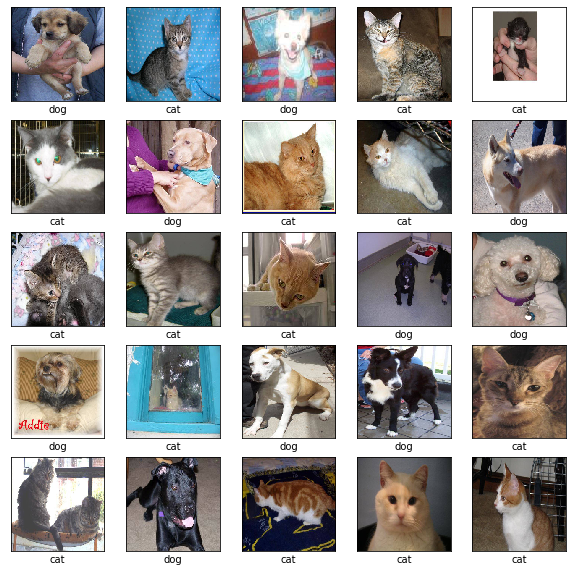

In [10]:
display_images(train_images, train_labels)
plt.show()

In [12]:
input_layer = tf.keras.Input(shape=train_images.shape[1:])
conv0_0 = Conv2D(filters=64,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(input_layer)
conv0_1 = Conv2D(filters=64,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv0_0)

pool1_0 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv0_1)
conv1_1 = Conv2D(filters=128,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(pool1_0)
conv1_2 = Conv2D(filters=128,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv1_1)

pool2_0 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv1_2)
conv2_1 = Conv2D(filters=256,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(pool2_0)
conv2_2 = Conv2D(filters=256,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv2_1)
conv2_3 = Conv2D(filters=256,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv2_2)
conv2_4 = Conv2D(filters=256,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv2_3)

pool3_0 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv2_4)
conv3_1 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(pool3_0)
conv3_2 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv3_1)
conv3_3 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv3_2)
conv3_4 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv3_3)

pool4_0 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv3_4)
conv4_1 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(pool4_0)
conv4_2 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv4_1)
conv4_3 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv4_2)
conv4_4 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv4_3)

pool5 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv4_4)
flat = keras.layers.Flatten()(pool5)
dense1 = keras.layers.Dense(units=4096,activation='relu')(flat)
dropout = keras.layers.Dropout(0.4)(dense1)
dense2 = keras.layers.Dense(units=4096,activation='relu')(dropout)
dense3 = keras.layers.Dense(units=2,activation='sigmoid')(dense2)
VGG19 = keras.models.Model([input_layer],dense3)
VGG19.compile(optimizer = 'sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
VGG19.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0   

In [13]:
##train_images,train_labels = shuffle(train_images,train_labels)

In [14]:
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [17]:
train_tmp_images,train_tmp_labels = shuffle(train_images,train_labels)

In [18]:
length = len(train_images)*0.8

images_to_train = train_tmp_images[:int(length)]
labels_to_train = train_tmp_labels[:int(length)]

In [19]:
print(labels_to_train)

[0 0 1 ... 1 1 1]


In [ ]:
VGG19.fit(train_images, train_labels, epochs=5,batch_size=32,shuffle=True)

Train on 25000 samples
Epoch 1/5
 1632/25000 [>.............................] - ETA: 4:43:05 - loss: 0.6932 - accuracy: 0.4969

In [23]:
print("evaluate......")
scroe, accuracy = model.evaluate(train_tmp_images[int(length)+1:], train_tmp_labels[int(length)+1:])

evaluate......
4999/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [24]:
print('scroe:', scroe, 'accuracy:', accuracy)

scroe: 0.6928056558028868 accuracy: 0.51370275


In [ ]:
#data_test_root = r'./dataset/Animal/Cat&Dog/test'+'/*.jpg'
#print(data_test_root)

In [ ]:
# test_images = list()
# test_labels = list()
# for img_path in glob(data_test_root):
#     img = load_img(str(img_path),target_size=[224, 224])
#     arr = img_to_array(img)
#     new_img = array_to_img(arr)
#     test_images.append(arr)

In [ ]:
# test_images = np.array(test_images,dtype=float)
# test_labels = np.array(test_labels)

In [ ]:
# print(train_images.shape)
# print(train_labels.shape)

In [ ]:
#model.evaluate(test_images, test_labels)

In [ ]:
# predictions = model.predict(test_images)

In [ ]:
# print(predictions[0])
# print(np.argmax(predictions[:10]))
# test_labels = list(test_labels)
# print(test_labels)
# k = 0
# for i in range(len(predictions)):
#     w = np.argmax(predictions[i])
#     print(k+1,w)
#     #print(k,np.argmax(predictions[i]))
#     k+=1

In [ ]:
# print(tag_name)

In [ ]:
# predictions_2 = model.predict(train_images)

In [ ]:
# print(len(predictions_2))

In [ ]:
# k = 0
# train_test_labels = list()
# for i in range(len(predictions_2)):
#     train_test_labels.append(np.argmax(predictions[i]))
#     print(k,train_labels[i],np.argmax(predictions[i]))
#     if k == 50:
#         break
#     k+=1

In [ ]:
# train_test_labels = np.array(train_test_labels)
# model.evaluate(train_images[:50],train_test_labels[:50])